# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
import pandas as pd

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<Axes: title={'center': 'Dispersion'}, xlabel='Age', ylabel='Tardies'>

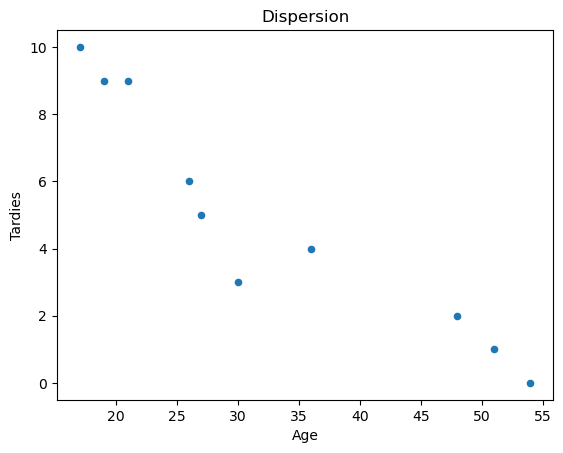

In [8]:
import matplotlib.pyplot as plt

student_data.plot.scatter(x='Age', y='Tardies', title='Dispersion')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [11]:
from scipy.stats import pearsonr

pearsonr(student_data["Age"], student_data["Tardies"])[0]

-0.9391626886887123

In [4]:
#You can observe there is a very strong trend which shows that in fact the younger the student is, the later he arrives to class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
correlation = pearsonr(student_data["Age"], student_data["Tardies"])[0]

#covariance:
covariance = student_data.cov()
covariance_age_tardies = covariance.loc['Age', 'Tardies']

print(correlation)
print(covariance_age_tardies)

-0.9391626886887123
-45.56666666666667


In [6]:
#The correlation value shows that it has a very strong correlation. The negative covariance shows that as the age progresses, the tardies get lower at that degree.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
from sklearn.linear_model import LinearRegression

x = student_data[["Age"]]
y = student_data["Tardies"]

model = LinearRegression()

model.fit(x,y)

slope = model.coef_
interception = model.intercept_

print(f"Slope of our Reg line is {slope} \n Y-intercept is {interception}")



Slope of our Reg line is [-0.24282077] 
 Y-intercept is 12.888803363135771


In [8]:
#the outcome variable is the "Tardies" which is the variable we are trying to predict. I used Linear Regression.

Plot your regression model on your scatter plot.

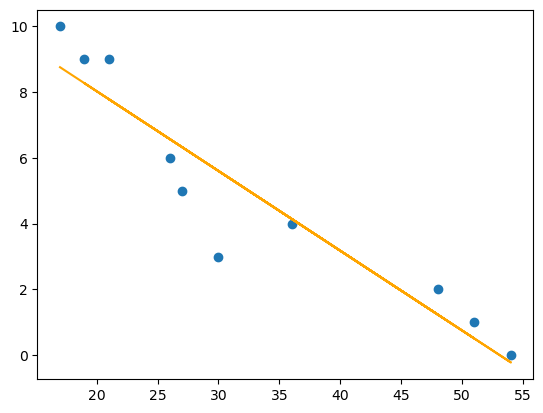

In [9]:
reg_line = interception + slope*x

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
#The model shows that in fact, as age progresses, the tardies get lower at that degree. Age seems to be a good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
vehicles = pd.read_csv('vehicles.csv')
vehicles


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
correlations = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

print(correlations)

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

In [13]:
#The "Fuel Barrels/Year" is the most important and "Year" the least.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Slope of our Reg line is [26.2836254] 
 Y-intercept is 12.48652083074984


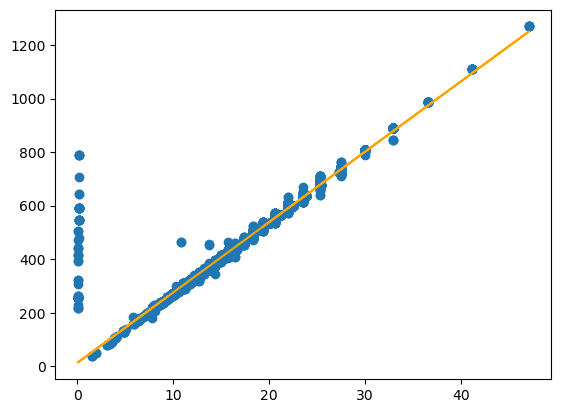

In [14]:
x = vehicles[["Fuel Barrels/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

model = LinearRegression()

model.fit(x,y)

slope = model.coef_
interception = model.intercept_

print(f"Slope of our Reg line is {slope} \n Y-intercept is {interception}")

reg_line = interception + slope*x

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()


Slope of our Reg line is [-2.62433344] 
 Y-intercept is 5725.8632907048905


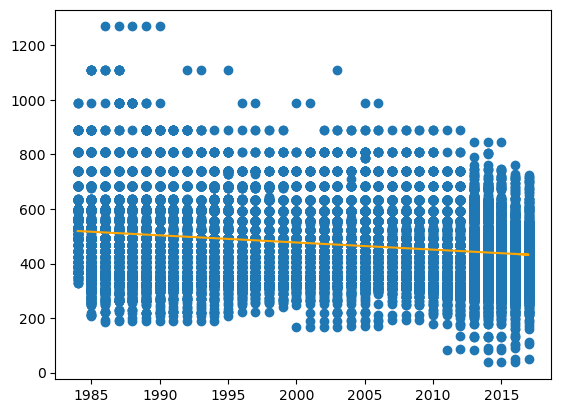

In [15]:
x = vehicles[["Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

model = LinearRegression()

model.fit(x,y)

slope = model.coef_
interception = model.intercept_

print(f"Slope of our Reg line is {slope} \n Y-intercept is {interception}")

reg_line = interception + slope*x

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [16]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [4]:
invite = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'Came': [1, 2, 4, 4, 5, 7, 8, 13]})
invite


,Invited,Came
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Slope of our Reg line is [0.84848485] 
 Y-intercept is -0.43939393939393767


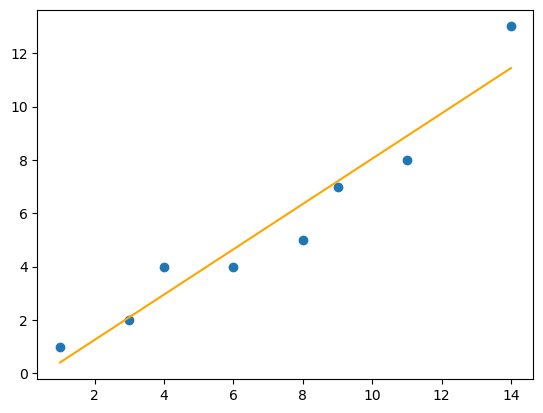

In [9]:
x = invite[["Invited"]]
y = invite["Came"]

model = LinearRegression()

model.fit(x,y)

slope = model.coef_
interception = model.intercept_

print(f"Slope of our Reg line is {slope} \n Y-intercept is {interception}")

reg_line = interception + slope*x

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [12]:
correlation = pearsonr(invite["Invited"], invite["Came"])[0]
correlation


0.9652303546573691

In [20]:
#The two variables are highly correlated.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [14]:
Q1 = invite['Invited'].quantile(0.25)
Q3 = invite['Invited'].quantile(0.75)

print(f"First quantile (25th percentile): {Q1}")
print(f"Third quantile (75th percentile): {Q3}")

First quantile (25th percentile): 3.75
Third quantile (75th percentile): 9.5


In [15]:
IQR = Q3 - Q1
IQR

5.75

In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-4.875
18.125


In [18]:
invite_filtered = invite[(invite['Invited'] >= lower_bound) & (invite['Invited'] <= upper_bound)]
invite_filtered

,Invited,Came
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [22]:
#Nothing changed